In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import scipy.io as sp
import matplotlib.transforms as transforms

In [2]:
pred = ["P(A1)", "P(A2)", "P(A3)", "P(¬A1)", "P(¬A2)", "P(¬A3)",
       "P(A2|A1)","P(A2|¬A1)","P(¬A2|A1)","P(¬A2|¬A1)", 
        "P(A1 ∩ A2)", "P(A1 ∩ ¬A2)","P(¬A1 ∩ A2)","P(¬A1 ∩ ¬A2)", 
        "P(A1 ∪ A2)", "P(A1 ∪ ¬A2)", "P(¬A1 ∪ A2)", "P(¬A1 ∪ ¬A2)", 
        "P(A3|A2)", "P(A3|¬A2)", "P(¬A3|A2)", "P(¬A3|¬A2)",
        "P(A2 ∩ A3)", "P(A2 ∩ ¬A3)", "P(¬A2 ∩ A3)","P(¬A2 ∩ ¬A3)", 
       "P(A2 ∪ A3)", "P(A2 ∪ ¬A3)", "P(¬A2 ∪ A3)", "P(¬A2 ∪ ¬A3)", 
        "P(A1|A3)", "P(A1|¬A3)", "P(¬A1|A3)", "P(¬A1|¬A3)",
       "P(A3 ∩ A1)", "P(A3 ∩ ¬A1)", "P(¬A3 ∩ A1)", "P(¬A3 ∩ ¬A1)", 
        "P(A3 ∪ A1)", "P(A3 ∪ ¬A1)", "P(¬A3 ∪ A1)", "P(¬A3 ∪ ¬A1)", 
        "P(A1|A2)", "P(¬A1|A2)", "P(A1|¬A2)", "P(¬A1|¬A2)", 
       "P(A2 ∩ A1)", "P(¬A2 ∩ A1)", "P(A2 ∩ ¬A1)", "P(¬A2 ∩ ¬A1)", 
        "P(A2 ∪ A1)", "P(¬A2 ∪ A1)", "P(A2 ∪ ¬A1)", "P(¬A2 ∪ ¬A1)", 
        "P(A2|A3)", "P(¬A2|A3)", "P(A2|¬A3)", "P(¬A2|¬A3)", 
        "P(A3 ∩ A2)", "P(¬A3 ∩ A2)", "P(A3 ∩ ¬A2)", "P(¬A3 ∩ ¬A2)",
       "P(A3 ∪ A2)", "P(¬A3 ∪ A2)", "P(A3 ∪ ¬A2)", "P(¬A3 ∪ ¬A2)", "P(A3|A1)", "P(¬A3|A1)", "P(A3|¬A1)", 
        "P(¬A3|¬A1)", "P(A1 ∩ A3)", "P(¬A1 ∩ A3)", "P(A1 ∩ ¬A3)", "P(¬A1 ∩ ¬A3)", 
       "P(A1 ∪ A3)", "P(¬A1 ∪ A3)", "P(A1 ∪ ¬A3)", "P(¬A1 ∪ ¬A3)"]

In [3]:
pred_new = []
for p in pred:
    p = p.replace("A1","A")
    p = p.replace("A2","B")
    p = p.replace("A3","C")
    p = p.replace("P(","")
    p = p.replace(")","")
    pred_new.append(p)
pred = pred_new

# Load Data and Model Fits

In [4]:
BS_MS = sp.loadmat("IndDat_bs1_Ms.mat")['Ms_all'][0: 1162,:]
BS_MS.shape

(1162, 78)

In [5]:
BS_MS[0,:]

array([28.4852389 , 29.602571  , 32.08296148, 71.5147611 , 70.397429  ,
       67.91703852, 29.89037273, 29.49502596, 70.10962727, 70.50497404,
       14.54706243, 24.12931735, 25.12489483, 51.87421524, 48.12578476,
       74.87510517, 75.87068265, 85.45293757, 27.90379615, 33.74601688,
       72.09620385, 66.25398312, 14.33419214, 25.34211687, 27.55324004,
       48.39043423, 51.60956577, 72.44675996, 74.65788313, 85.66580786,
       24.4186786 , 30.32423084, 75.5813214 , 69.67576916, 13.95963099,
       27.93708205, 24.72827466, 49.01572617, 50.98427383, 75.27172534,
       72.06291795, 86.04036901, 28.76053863, 71.23946137, 28.37607019,
       71.62392981, 14.54706243, 24.12931735, 25.12489483, 51.87421524,
       48.12578476, 74.87510517, 75.87068265, 85.45293757, 25.79124274,
       74.20875726, 31.32486707, 68.67513293, 14.33419214, 25.34211687,
       27.55324004, 48.39043423, 51.60956577, 72.44675996, 74.65788313,
       85.66580786, 27.42037426, 72.57962574, 33.83199873, 66.16

In [6]:
QSS_MS = sp.loadmat("IndDat_int1_qq_Ms.mat")['Ms_all'][0: 1162,:]
QSS_MS.shape

(1162, 78)

In [7]:
CSS_MS = sp.loadmat("IndDat_classical_Ms.mat")['Ms_all'][0: 1162,:]
CSS_MS.shape

(1162, 78)

In [8]:
RF_MS = sp.loadmat("IndDat_rf_Ms.mat")['Ms_all'][0: 1162,:]
RF_MS.shape

(1162, 78)

In [9]:
data = sp.loadmat("indDat.mat")['Rdat'][0:1162, :]
data.shape

(1162, 78)

# Create Table For Plot

In [10]:
def add_data(mean_tab, pair_name, pair_index, i, j, BS_MS, QSS_MS, CSS_MS, RF_MS, data):
    mean_tab["subject"].append(j)
    mean_tab["rating"].append(data[j,i])
    mean_tab["pred"].append(pred[i])
    mean_tab["type"].append("data")
    mean_tab["subject"].append(j)
    mean_tab["rating"].append(BS_MS[j,i])
    mean_tab["pred"].append(pred[i])
    mean_tab["type"].append("BS")
    mean_tab["subject"].append(j)
    mean_tab["rating"].append(QSS_MS[j,i])
    mean_tab["pred"].append(pred[i])
    mean_tab["type"].append("QSS")
    mean_tab["subject"].append(j)
    mean_tab["rating"].append(CSS_MS[j,i])
    mean_tab["pred"].append(pred[i])
    mean_tab["type"].append("CSS")
    mean_tab["subject"].append(j)
    mean_tab["rating"].append(RF_MS[j,i])
    mean_tab["pred"].append(pred[i])
    mean_tab["type"].append("RF")
    mean_tab["pair"].append(pair_name+str(pair_index[0])+"_"+pair_name+str(pair_index[1]))
    mean_tab["pair"].append(pair_name+str(pair_index[0])+"_"+pair_name+str(pair_index[1]))
    mean_tab["pair"].append(pair_name+str(pair_index[0])+"_"+pair_name+str(pair_index[1]))
    mean_tab["pair"].append(pair_name+str(pair_index[0])+"_"+pair_name+str(pair_index[1]))
    mean_tab["pair"].append(pair_name+str(pair_index[0])+"_"+pair_name+str(pair_index[1]))
    return mean_tab

In [11]:
#0-585 are the {Michgan, Ohio, Missouri} triplet, and 585-1162 are the {Mont}
mean_tab = {"subject":[],"rating": [], "type": [], "pred": [], "pair":[]}
for j in range(0,1162):
    if j < 585:
        pair_name = "A"
    else:
        pair_name = "B"
    for i in range(0, 78):
        if "C" not in pred[i]:
            mean_tab = add_data(mean_tab, pair_name, [1,2], i, j, BS_MS, QSS_MS, CSS_MS, RF_MS, data)
        if "B" not in pred[i]:
            mean_tab = add_data(mean_tab, pair_name, [1,3], i, j, BS_MS, QSS_MS, CSS_MS, RF_MS, data)
        if "A" not in pred[i]:
            mean_tab = add_data(mean_tab, pair_name, [2,3], i, j, BS_MS, QSS_MS, CSS_MS, RF_MS, data)

In [12]:
mean_tab = pd.DataFrame(mean_tab)
mean_tab

,subject,rating,type,pred,pair
0,0,50.000000,data,A,A1_A2
1,0,28.485239,BS,A,A1_A2
2,0,21.024456,QSS,A,A1_A2
3,0,20.978076,CSS,A,A1_A2
4,0,28.201033,RF,A,A1_A2
...,...,...,...,...,...
488035,1161,65.000000,data,¬A ∪ ¬C,B1_B3
488036,1161,54.527864,BS,¬A ∪ ¬C,B1_B3
488037,1161,68.603178,QSS,¬A ∪ ¬C,B1_B3
488038,1161,67.710146,CSS,¬A ∪ ¬C,B1_B3


In [13]:
mean_tab.to_csv("mean_tab.csv")

# Make Mean Plots

In [14]:
mean_plot_tab = {"tab":{}, "mean":{}}

In [15]:
for pair in mean_tab["pair"].unique():
    mean_plot_tab["tab"][pair] = {}
    mean_plot_tab["mean"][pair] = {}
    for m in mean_tab["type"].unique():
        model_tab = mean_tab[mean_tab["pair"] == pair]
        model_tab = model_tab[model_tab["type"] == m]
        mean_plot_tab["tab"][pair][m] = model_tab
        means = []
        for p in model_tab['pred'].unique():
            pred_tab = model_tab[model_tab["pred"] == p]
            #Compute Means
            means.append(np.mean(pred_tab["rating"]))
        mean_plot_tab["mean"][pair][m] = means

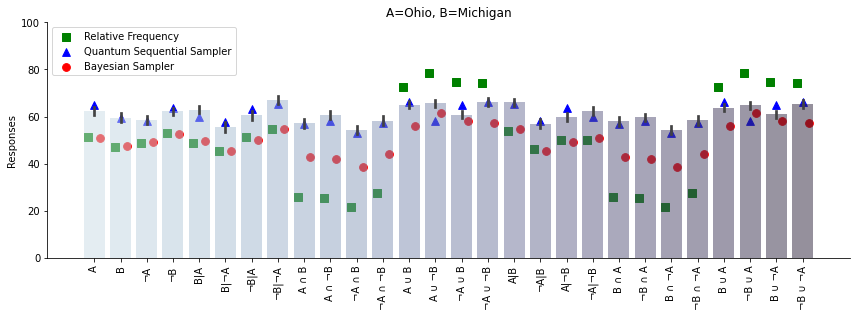

In [16]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=mean_plot_tab["tab"]["A1_A2"]["data"], alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.xticks(rotation = 90)
plt.ylim(0,100)
plt.title("A=Ohio, B=Michigan")
plt.scatter(mean_plot_tab["tab"]["A1_A2"]["RF"]["pred"].unique(), mean_plot_tab["mean"]["A1_A2"]["RF"], 
            marker = "s", color = "green", s = plt.rcParams['lines.markersize'] * 10, label = "Relative Frequency",
           transform=trans+offset(-6))
plt.scatter(mean_plot_tab["tab"]["A1_A2"]["QSS"]["pred"].unique(), mean_plot_tab["mean"]["A1_A2"]["QSS"], 
            marker = "^", color = "blue", s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",
           transform=trans+offset(0))
plt.scatter(mean_plot_tab["tab"]["A1_A2"]["BS"]["pred"].unique(), mean_plot_tab["mean"]["A1_A2"]["BS"], 
            marker = "o", color = "red", s = plt.rcParams['lines.markersize'] * 10, label = "Bayesian Sampler",
           transform=trans+offset(6))
plt.legend()
plt.xlabel("")
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.savefig("mean_A1_A2.jpg",dpi = 500)

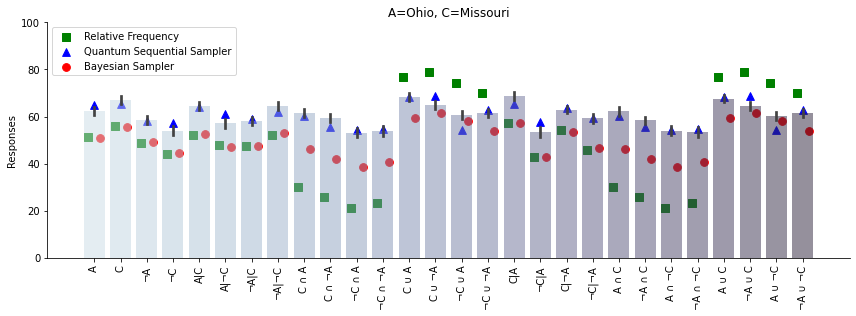

In [17]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=mean_plot_tab["tab"]["A1_A3"]["data"], alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.xticks(rotation = 90)
plt.ylim(0,100)
plt.title("A=Ohio, C=Missouri")
plt.scatter(mean_plot_tab["tab"]["A1_A3"]["RF"]["pred"].unique(), mean_plot_tab["mean"]["A1_A3"]["RF"], 
            marker = "s", color = "green", s = plt.rcParams['lines.markersize'] * 10, label = "Relative Frequency",
           transform=trans+offset(-6))
plt.scatter(mean_plot_tab["tab"]["A1_A3"]["QSS"]["pred"].unique(), mean_plot_tab["mean"]["A1_A3"]["QSS"], 
            marker = "^", color = "blue", s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",
           transform=trans+offset(0))
plt.scatter(mean_plot_tab["tab"]["A1_A3"]["BS"]["pred"].unique(), mean_plot_tab["mean"]["A1_A3"]["BS"], 
            marker = "o", color = "red", s = plt.rcParams['lines.markersize'] * 10, label = "Bayesian Sampler",
           transform=trans+offset(6))
plt.legend()
plt.xlabel("")
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.savefig("mean_A1_A3.jpg",dpi = 500)

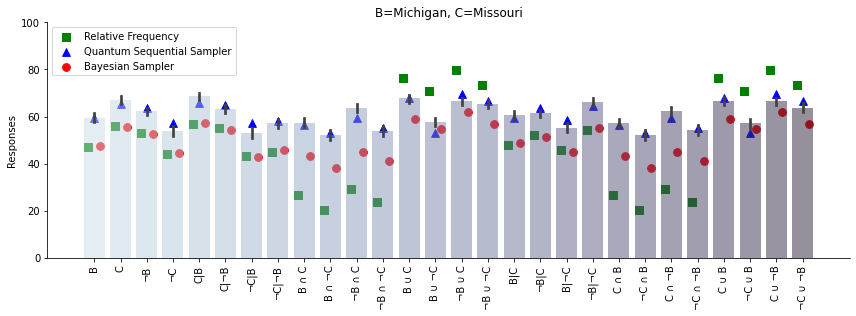

In [18]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=mean_plot_tab["tab"]["A2_A3"]["data"], alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.xticks(rotation = 90)
plt.ylim(0,100)
plt.title("B=Michigan, C=Missouri")
plt.scatter(mean_plot_tab["tab"]["A2_A3"]["RF"]["pred"].unique(), mean_plot_tab["mean"]["A2_A3"]["RF"], 
            marker = "s", color = "green", s = plt.rcParams['lines.markersize'] * 10, label = "Relative Frequency",
           transform=trans+offset(-6))
plt.scatter(mean_plot_tab["tab"]["A2_A3"]["QSS"]["pred"].unique(), mean_plot_tab["mean"]["A2_A3"]["QSS"], 
            marker = "^", color = "blue", s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",
           transform=trans+offset(0))
plt.scatter(mean_plot_tab["tab"]["A2_A3"]["BS"]["pred"].unique(), mean_plot_tab["mean"]["A2_A3"]["BS"], 
            marker = "o", color = "red", s = plt.rcParams['lines.markersize'] * 10, label = "Bayesian Sampler",
           transform=trans+offset(6))
plt.legend()
plt.xlabel("")
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.savefig("mean_A2_A3.jpg",dpi = 500)

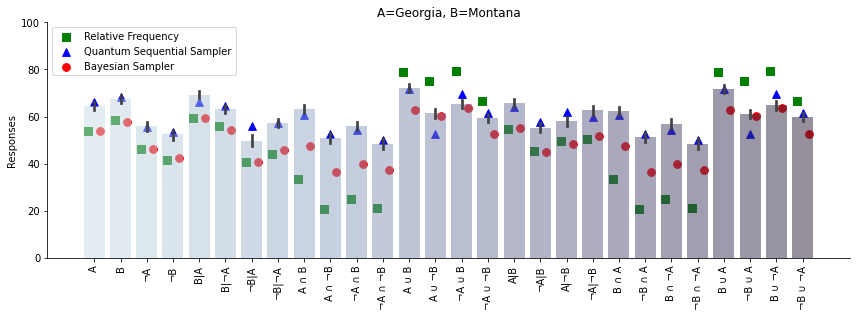

In [19]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=mean_plot_tab["tab"]["B1_B2"]["data"], alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.xticks(rotation = 90)
plt.ylim(0,100)
plt.title("A=Georgia, B=Montana")
plt.scatter(mean_plot_tab["tab"]["B1_B2"]["RF"]["pred"].unique(), mean_plot_tab["mean"]["B1_B2"]["RF"], 
            marker = "s", color = "green", s = plt.rcParams['lines.markersize'] * 10, label = "Relative Frequency",
           transform=trans+offset(-6))
plt.scatter(mean_plot_tab["tab"]["B1_B2"]["QSS"]["pred"].unique(), mean_plot_tab["mean"]["B1_B2"]["QSS"], 
            marker = "^", color = "blue", s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",
           transform=trans+offset(0))
plt.scatter(mean_plot_tab["tab"]["B1_B2"]["BS"]["pred"].unique(), mean_plot_tab["mean"]["B1_B2"]["BS"], 
            marker = "o", color = "red", s = plt.rcParams['lines.markersize'] * 10, label = "Bayesian Sampler",
           transform=trans+offset(6))
plt.legend()
plt.xlabel("")
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.savefig("mean_B1_B2.jpg",dpi = 500)

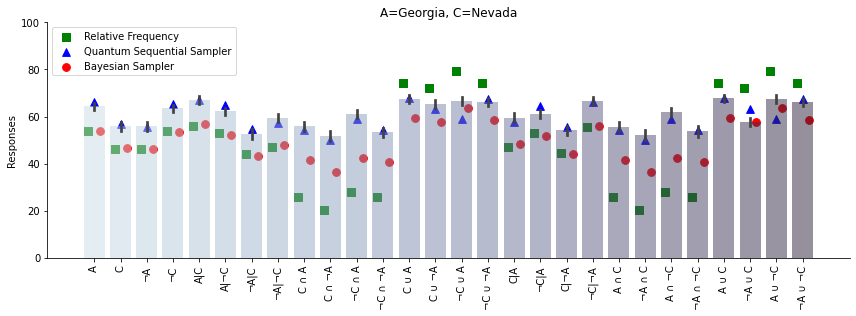

In [20]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=mean_plot_tab["tab"]["B1_B3"]["data"], alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.xticks(rotation = 90)
plt.ylim(0,100)
plt.title("A=Georgia, C=Nevada")
plt.scatter(mean_plot_tab["tab"]["B1_B3"]["RF"]["pred"].unique(), mean_plot_tab["mean"]["B1_B3"]["RF"], 
            marker = "s", color = "green", s = plt.rcParams['lines.markersize'] * 10, label = "Relative Frequency",
           transform=trans+offset(-6))
plt.scatter(mean_plot_tab["tab"]["B1_B3"]["QSS"]["pred"].unique(), mean_plot_tab["mean"]["B1_B3"]["QSS"], 
            marker = "^", color = "blue", s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",
           transform=trans+offset(0))
plt.scatter(mean_plot_tab["tab"]["B1_B3"]["BS"]["pred"].unique(), mean_plot_tab["mean"]["B1_B3"]["BS"], 
            marker = "o", color = "red", s = plt.rcParams['lines.markersize'] * 10, label = "Bayesian Sampler",
           transform=trans+offset(6))
plt.legend()
plt.xlabel("")
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.savefig("mean_B1_B3.jpg",dpi = 500)

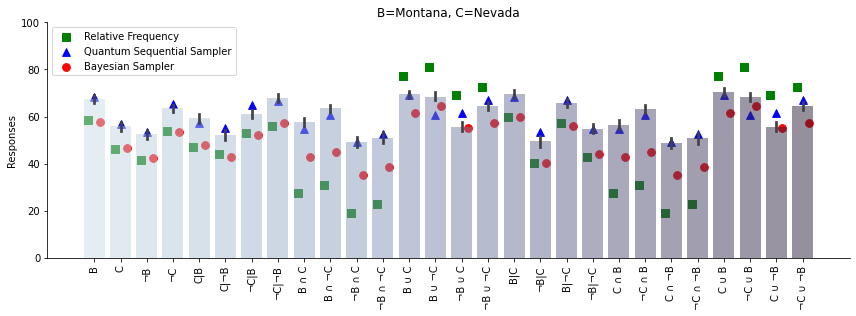

In [21]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=mean_plot_tab["tab"]["B2_B3"]["data"], alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.xticks(rotation = 90)
plt.ylim(0,100)
plt.title("B=Montana, C=Nevada")
plt.scatter(mean_plot_tab["tab"]["B2_B3"]["RF"]["pred"].unique(), mean_plot_tab["mean"]["B2_B3"]["RF"], 
            marker = "s", color = "green", s = plt.rcParams['lines.markersize'] * 10, label = "Relative Frequency",
           transform=trans+offset(-6))
plt.scatter(mean_plot_tab["tab"]["B2_B3"]["QSS"]["pred"].unique(), mean_plot_tab["mean"]["B2_B3"]["QSS"], 
            marker = "^", color = "blue", s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",
           transform=trans+offset(0))
plt.scatter(mean_plot_tab["tab"]["B2_B3"]["BS"]["pred"].unique(), mean_plot_tab["mean"]["B2_B3"]["BS"], 
            marker = "o", color = "red", s = plt.rcParams['lines.markersize'] * 10, label = "Bayesian Sampler",
           transform=trans+offset(6))
plt.legend()
plt.xlabel("")
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.savefig("mean_B2_B3.jpg",dpi = 500)

# QSS vs CSS

## All participants Mean

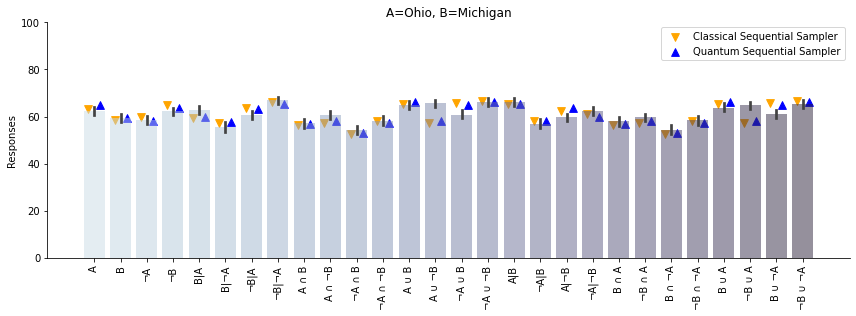

In [22]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=mean_plot_tab["tab"]["A1_A2"]["data"], alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.xticks(rotation = 90)
plt.ylim(0,100)
plt.title("A=Ohio, B=Michigan")
plt.scatter(mean_plot_tab["tab"]["A1_A2"]["CSS"]["pred"].unique(), mean_plot_tab["mean"]["A1_A2"]["CSS"], 
            marker = "v", color = "orange", s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler",
           transform=trans+offset(-6))
plt.scatter(mean_plot_tab["tab"]["A1_A2"]["QSS"]["pred"].unique(), mean_plot_tab["mean"]["A1_A2"]["QSS"], 
            marker = "^", color = "blue", s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",
           transform=trans+offset(6))
plt.legend()
plt.xlabel("")
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.savefig("CQSS/mean_A1_A2_CQSS.jpg",dpi = 500)

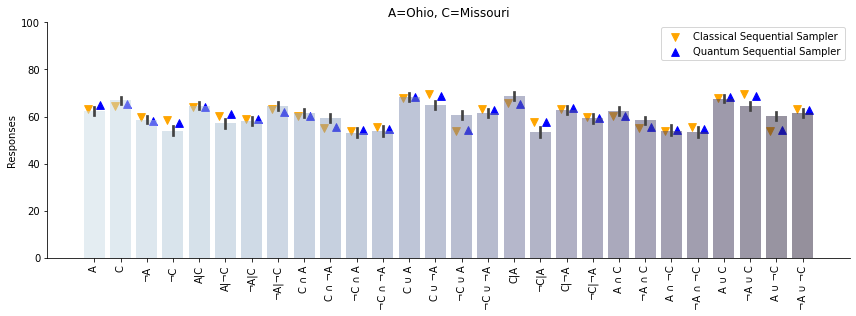

In [23]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=mean_plot_tab["tab"]["A1_A3"]["data"], alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.xticks(rotation = 90)
plt.ylim(0,100)
plt.title("A=Ohio, C=Missouri")
plt.scatter(mean_plot_tab["tab"]["A1_A3"]["CSS"]["pred"].unique(), mean_plot_tab["mean"]["A1_A3"]["CSS"], 
            marker = "v", color = "orange", s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler",
           transform=trans+offset(-6))
plt.scatter(mean_plot_tab["tab"]["A1_A3"]["QSS"]["pred"].unique(), mean_plot_tab["mean"]["A1_A3"]["QSS"], 
            marker = "^", color = "blue", s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",
           transform=trans+offset(6))
plt.legend()
plt.xlabel("")
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.savefig("CQSS/mean_A1_A3_CQSS.jpg",dpi = 500)

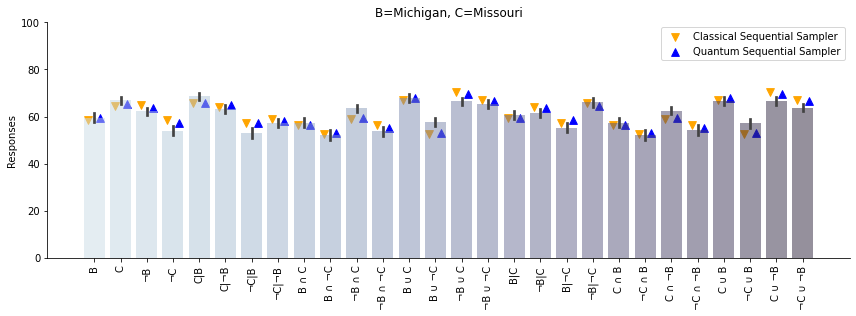

In [24]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=mean_plot_tab["tab"]["A2_A3"]["data"], alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.xticks(rotation = 90)
plt.ylim(0,100)
plt.title("B=Michigan, C=Missouri")
plt.scatter(mean_plot_tab["tab"]["A2_A3"]["CSS"]["pred"].unique(), mean_plot_tab["mean"]["A2_A3"]["CSS"], 
            marker = "v", color = "orange", s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler",
           transform=trans+offset(-6))
plt.scatter(mean_plot_tab["tab"]["A2_A3"]["QSS"]["pred"].unique(), mean_plot_tab["mean"]["A2_A3"]["QSS"], 
            marker = "^", color = "blue", s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",
           transform=trans+offset(6))
plt.legend()
plt.xlabel("")
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.savefig("CQSS/mean_A2_A3_CQSS.jpg",dpi = 500)

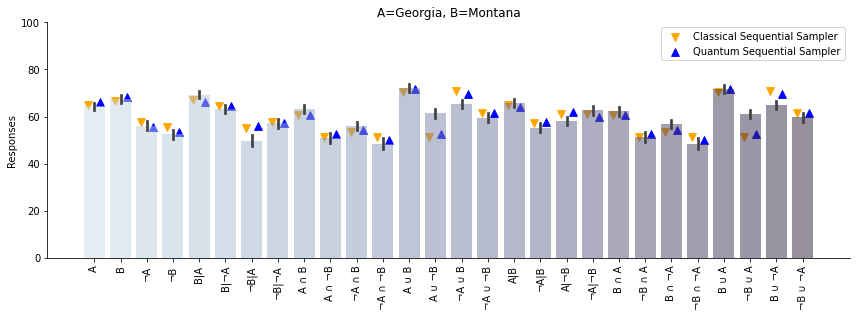

In [25]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=mean_plot_tab["tab"]["B1_B2"]["data"], alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.xticks(rotation = 90)
plt.ylim(0,100)
plt.title("A=Georgia, B=Montana")
plt.scatter(mean_plot_tab["tab"]["B1_B2"]["CSS"]["pred"].unique(), mean_plot_tab["mean"]["B1_B2"]["CSS"], 
            marker = "v", color = "orange", s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler",
           transform=trans+offset(-6))
plt.scatter(mean_plot_tab["tab"]["B1_B2"]["QSS"]["pred"].unique(), mean_plot_tab["mean"]["B1_B2"]["QSS"], 
            marker = "^", color = "blue", s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",
           transform=trans+offset(6))
plt.legend()
plt.xlabel("")
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.savefig("CQSS/mean_B1_B2_CQSS.jpg",dpi = 500)

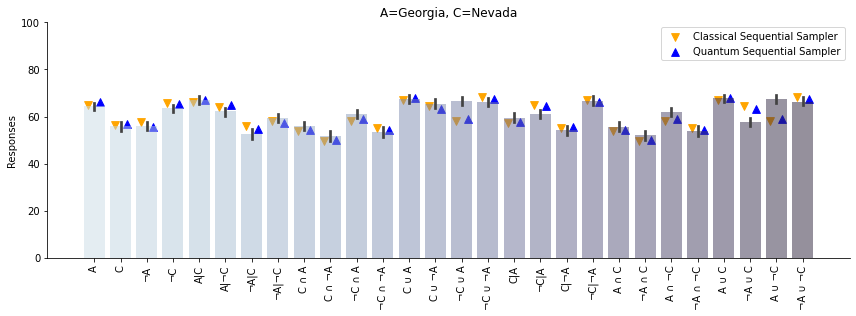

In [26]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=mean_plot_tab["tab"]["B1_B3"]["data"], alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.xticks(rotation = 90)
plt.ylim(0,100)
plt.title("A=Georgia, C=Nevada")
plt.scatter(mean_plot_tab["tab"]["B1_B3"]["CSS"]["pred"].unique(), mean_plot_tab["mean"]["B1_B3"]["CSS"], 
            marker = "v", color = "orange", s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler",
           transform=trans+offset(-6))
plt.scatter(mean_plot_tab["tab"]["B1_B3"]["QSS"]["pred"].unique(), mean_plot_tab["mean"]["B1_B3"]["QSS"], 
            marker = "^", color = "blue", s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",
           transform=trans+offset(6))
plt.legend()
plt.xlabel("")
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.savefig("CQSS/mean_B1_B3_CQSS.jpg",dpi = 500)

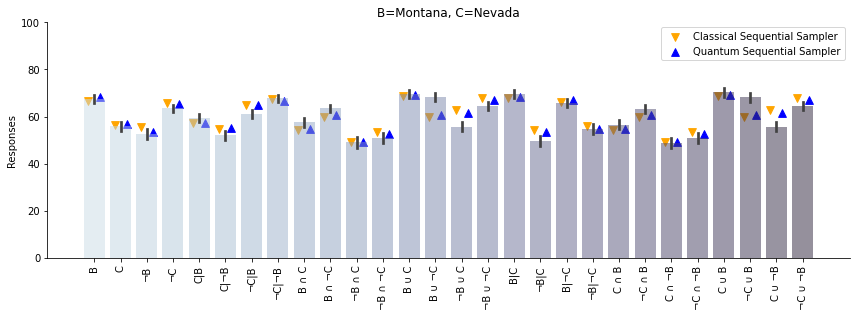

In [27]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=mean_plot_tab["tab"]["B2_B3"]["data"], alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.xticks(rotation = 90)
plt.ylim(0,100)
plt.title("B=Montana, C=Nevada")
plt.scatter(mean_plot_tab["tab"]["B2_B3"]["CSS"]["pred"].unique(), mean_plot_tab["mean"]["B2_B3"]["CSS"], 
            marker = "v", color = "orange", s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler",
           transform=trans+offset(-6))
plt.scatter(mean_plot_tab["tab"]["B2_B3"]["QSS"]["pred"].unique(), mean_plot_tab["mean"]["B2_B3"]["QSS"], 
            marker = "^", color = "blue", s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",
           transform=trans+offset(6))
plt.legend()
plt.xlabel("")
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.savefig("CQSS/mean_B2_B3_CQSS.jpg",dpi = 500)

## Two Sigma Participant Mean

In [28]:
two_sig_p = sp.loadmat("2sig_participant.mat")['participant_list'][0: 1162,:]
two_sig_p = two_sig_p.flatten()
two_sig_p = np.subtract(two_sig_p,1) #matlab is one indexing

In [29]:
two_sig_tab = {"tab":{}, "mean":{}}
for pair in mean_tab["pair"].unique():
    two_sig_tab["tab"][pair] = {}
    two_sig_tab["mean"][pair] = {}
    for m in mean_tab["type"].unique():
        model_tab = mean_tab[mean_tab["pair"] == pair]
        model_tab = model_tab[model_tab["type"] == m]
        model_tab = model_tab[model_tab["subject"].isin(two_sig_p)]
        two_sig_tab["tab"][pair][m] = model_tab
        means = []
        for p in model_tab['pred'].unique():
            pred_tab = model_tab[model_tab["pred"] == p]
            #Compute Means
            means.append(np.mean(pred_tab["rating"]))
        two_sig_tab["mean"][pair][m] = means

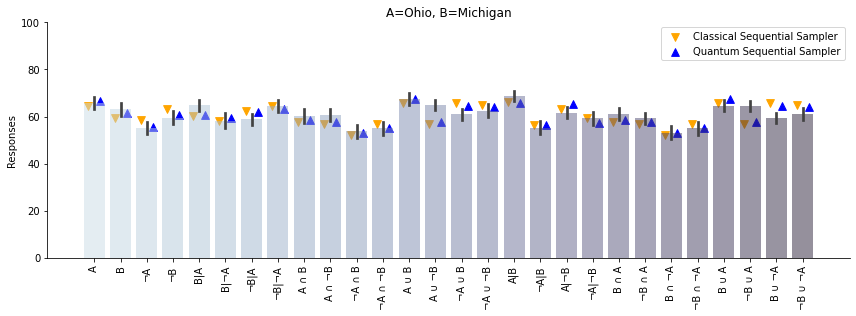

In [30]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=two_sig_tab["tab"]["A1_A2"]["data"], alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.xticks(rotation = 90)
plt.ylim(0,100)
plt.title("A=Ohio, B=Michigan")
plt.scatter(two_sig_tab["tab"]["A1_A2"]["CSS"]["pred"].unique(), two_sig_tab["mean"]["A1_A2"]["CSS"], 
            marker = "v", color = "orange", s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler",
           transform=trans+offset(-6))
plt.scatter(two_sig_tab["tab"]["A1_A2"]["QSS"]["pred"].unique(), two_sig_tab["mean"]["A1_A2"]["QSS"], 
            marker = "^", color = "blue", s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",
           transform=trans+offset(6))
plt.legend()
plt.xlabel("")
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.savefig("twosig/mean_A1_A2_twosig.jpg",dpi = 500)

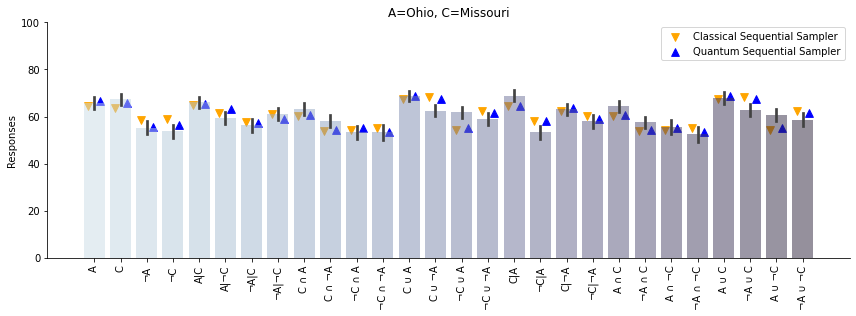

In [31]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=two_sig_tab["tab"]["A1_A3"]["data"], alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.xticks(rotation = 90)
plt.ylim(0,100)
plt.title("A=Ohio, C=Missouri")
plt.scatter(two_sig_tab["tab"]["A1_A3"]["CSS"]["pred"].unique(), two_sig_tab["mean"]["A1_A3"]["CSS"], 
            marker = "v", color = "orange", s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler",
           transform=trans+offset(-6))
plt.scatter(two_sig_tab["tab"]["A1_A3"]["QSS"]["pred"].unique(), two_sig_tab["mean"]["A1_A3"]["QSS"], 
            marker = "^", color = "blue", s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",
           transform=trans+offset(6))
plt.legend()
plt.xlabel("")
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.savefig("twosig/mean_A1_A3_twosig.jpg",dpi = 500)

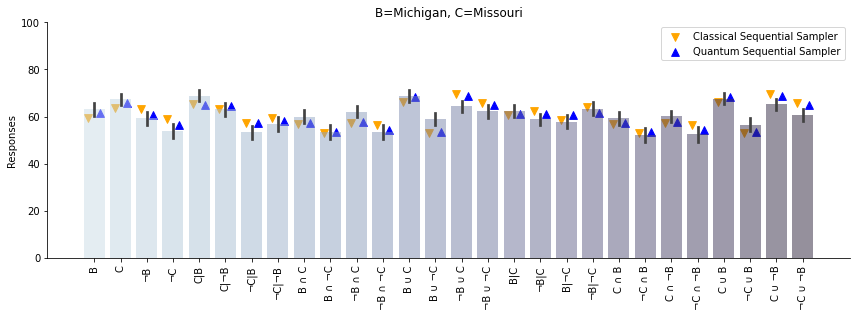

In [32]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=two_sig_tab["tab"]["A2_A3"]["data"], alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.xticks(rotation = 90)
plt.ylim(0,100)
plt.title("B=Michigan, C=Missouri")
plt.scatter(two_sig_tab["tab"]["A2_A3"]["CSS"]["pred"].unique(), two_sig_tab["mean"]["A2_A3"]["CSS"], 
            marker = "v", color = "orange", s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler",
           transform=trans+offset(-6))
plt.scatter(two_sig_tab["tab"]["A2_A3"]["QSS"]["pred"].unique(), two_sig_tab["mean"]["A2_A3"]["QSS"], 
            marker = "^", color = "blue", s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",
           transform=trans+offset(6))
plt.legend()
plt.xlabel("")
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.savefig("twosig/mean_A2_A3_twosig.jpg",dpi = 500)

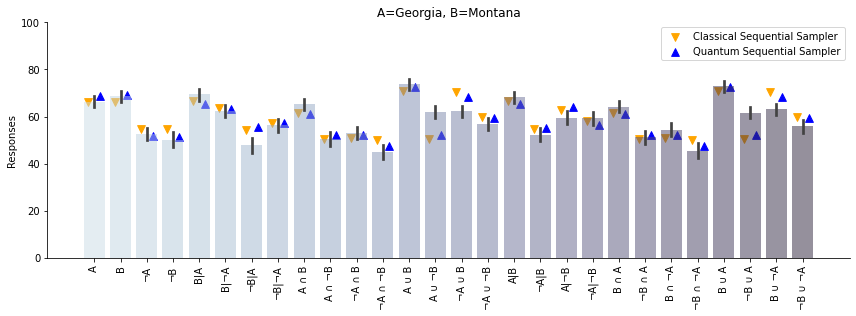

In [33]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=two_sig_tab["tab"]["B1_B2"]["data"], alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.xticks(rotation = 90)
plt.ylim(0,100)
plt.title("A=Georgia, B=Montana")
plt.scatter(two_sig_tab["tab"]["B1_B2"]["CSS"]["pred"].unique(), two_sig_tab["mean"]["B1_B2"]["CSS"], 
            marker = "v", color = "orange", s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler",
           transform=trans+offset(-6))
plt.scatter(two_sig_tab["tab"]["B1_B2"]["QSS"]["pred"].unique(), two_sig_tab["mean"]["B1_B2"]["QSS"], 
            marker = "^", color = "blue", s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",
           transform=trans+offset(6))
plt.legend()
plt.xlabel("")
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.savefig("twosig/mean_B1_B2_twosig.jpg",dpi = 500)

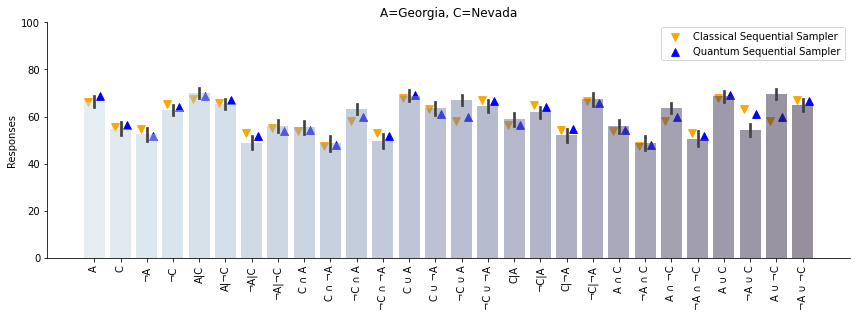

In [34]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=two_sig_tab["tab"]["B1_B3"]["data"], alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.xticks(rotation = 90)
plt.ylim(0,100)
plt.title("A=Georgia, C=Nevada")
plt.scatter(two_sig_tab["tab"]["B1_B3"]["CSS"]["pred"].unique(), two_sig_tab["mean"]["B1_B3"]["CSS"], 
            marker = "v", color = "orange", s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler",
           transform=trans+offset(-6))
plt.scatter(two_sig_tab["tab"]["B1_B3"]["QSS"]["pred"].unique(), two_sig_tab["mean"]["B1_B3"]["QSS"], 
            marker = "^", color = "blue", s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",
           transform=trans+offset(6))
plt.legend()
plt.xlabel("")
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.savefig("twosig/mean_B1_B3_twosig.jpg",dpi = 500)

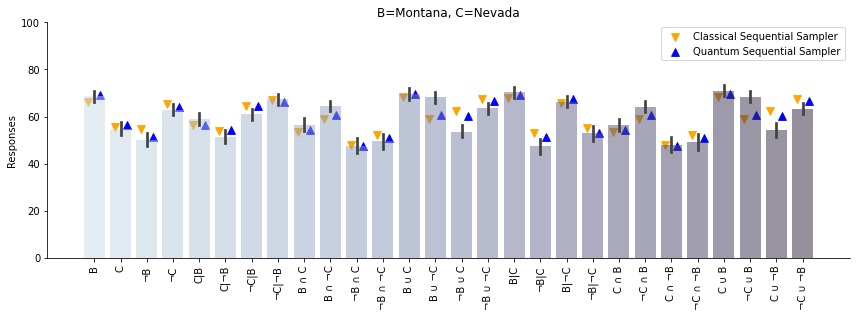

In [35]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=two_sig_tab["tab"]["B2_B3"]["data"], alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.xticks(rotation = 90)
plt.ylim(0,100)
plt.title("B=Montana, C=Nevada")
plt.scatter(two_sig_tab["tab"]["B2_B3"]["CSS"]["pred"].unique(), two_sig_tab["mean"]["B2_B3"]["CSS"], 
            marker = "v", color = "orange", s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler",
           transform=trans+offset(-6))
plt.scatter(two_sig_tab["tab"]["B2_B3"]["QSS"]["pred"].unique(), two_sig_tab["mean"]["B2_B3"]["QSS"], 
            marker = "^", color = "blue", s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",
           transform=trans+offset(6))
plt.legend()
plt.xlabel("")
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.savefig("twosig/mean_B2_B3_twosig.jpg",dpi = 500)

## Four Sigma Participant Mean

In [36]:
four_sig_p = sp.loadmat("4sig_participant.mat")['participant_list'][0: 1162,:]
four_sig_p = four_sig_p.flatten()
four_sig_p = np.subtract(four_sig_p,1) #matlab is one indexing

In [37]:
four_sig_tab = {"tab":{}, "mean":{}}
for pair in mean_tab["pair"].unique():
    four_sig_tab["tab"][pair] = {}
    four_sig_tab["mean"][pair] = {}
    for m in mean_tab["type"].unique():
        model_tab = mean_tab[mean_tab["pair"] == pair]
        model_tab = model_tab[model_tab["type"] == m]
        model_tab = model_tab[model_tab["subject"].isin(four_sig_p)]
        four_sig_tab["tab"][pair][m] = model_tab
        means = []
        for p in model_tab['pred'].unique():
            pred_tab = model_tab[model_tab["pred"] == p]
            #Compute Means
            means.append(np.mean(pred_tab["rating"]))
        four_sig_tab["mean"][pair][m] = means

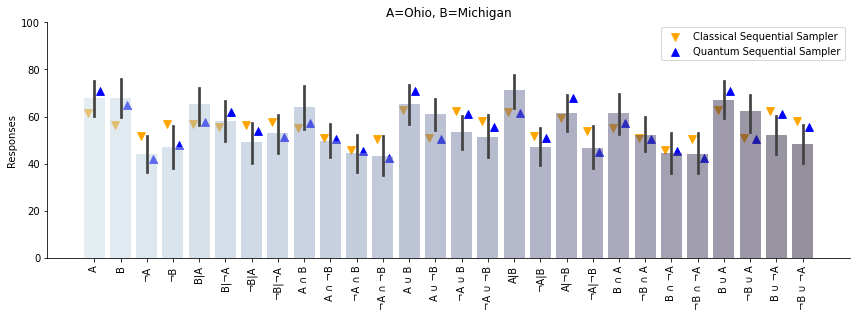

In [38]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=four_sig_tab["tab"]["A1_A2"]["data"], alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.xticks(rotation = 90)
plt.ylim(0,100)
plt.title("A=Ohio, B=Michigan")
plt.scatter(four_sig_tab["tab"]["A1_A2"]["CSS"]["pred"].unique(), four_sig_tab["mean"]["A1_A2"]["CSS"], 
            marker = "v", color = "orange", s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler",
           transform=trans+offset(-6))
plt.scatter(four_sig_tab["tab"]["A1_A2"]["QSS"]["pred"].unique(), four_sig_tab["mean"]["A1_A2"]["QSS"], 
            marker = "^", color = "blue", s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",
           transform=trans+offset(6))
plt.legend()
plt.xlabel("")
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.savefig("foursig/mean_A1_A2_foursig.jpg",dpi = 500)

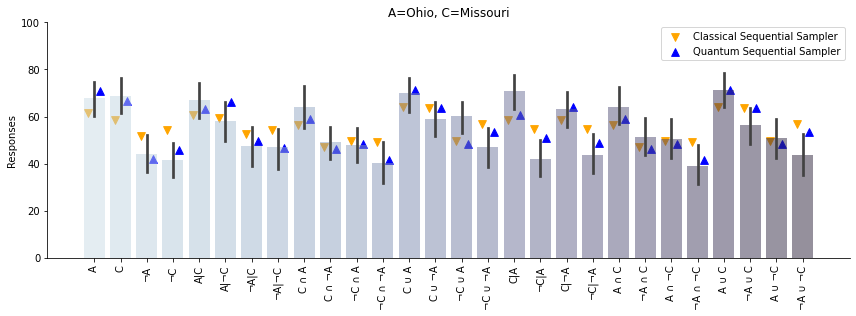

In [39]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=four_sig_tab["tab"]["A1_A3"]["data"], alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.xticks(rotation = 90)
plt.ylim(0,100)
plt.title("A=Ohio, C=Missouri")
plt.scatter(four_sig_tab["tab"]["A1_A3"]["CSS"]["pred"].unique(), four_sig_tab["mean"]["A1_A3"]["CSS"], 
            marker = "v", color = "orange", s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler",
           transform=trans+offset(-6))
plt.scatter(four_sig_tab["tab"]["A1_A3"]["QSS"]["pred"].unique(), four_sig_tab["mean"]["A1_A3"]["QSS"], 
            marker = "^", color = "blue", s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",
           transform=trans+offset(6))
plt.legend()
plt.xlabel("")
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.savefig("foursig/mean_A1_A3_foursig.jpg",dpi = 500)

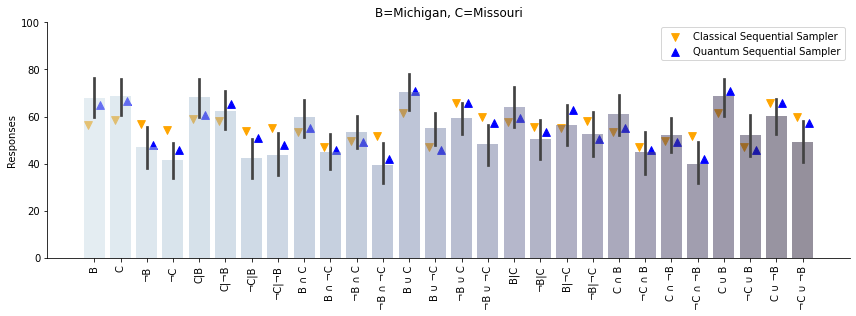

In [40]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=four_sig_tab["tab"]["A2_A3"]["data"], alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.xticks(rotation = 90)
plt.ylim(0,100)
plt.title("B=Michigan, C=Missouri")
plt.scatter(four_sig_tab["tab"]["A2_A3"]["CSS"]["pred"].unique(), four_sig_tab["mean"]["A2_A3"]["CSS"], 
            marker = "v", color = "orange", s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler",
           transform=trans+offset(-6))
plt.scatter(four_sig_tab["tab"]["A2_A3"]["QSS"]["pred"].unique(), four_sig_tab["mean"]["A2_A3"]["QSS"], 
            marker = "^", color = "blue", s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",
           transform=trans+offset(6))
plt.legend()
plt.xlabel("")
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.savefig("foursig/mean_A2_A3_foursig.jpg",dpi = 500)

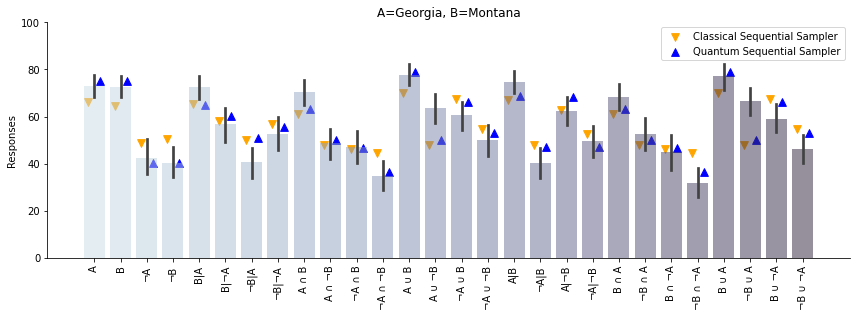

In [41]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=four_sig_tab["tab"]["B1_B2"]["data"], alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.xticks(rotation = 90)
plt.ylim(0,100)
plt.title("A=Georgia, B=Montana")
plt.scatter(four_sig_tab["tab"]["B1_B2"]["CSS"]["pred"].unique(), four_sig_tab["mean"]["B1_B2"]["CSS"], 
            marker = "v", color = "orange", s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler",
           transform=trans+offset(-6))
plt.scatter(four_sig_tab["tab"]["B1_B2"]["QSS"]["pred"].unique(), four_sig_tab["mean"]["B1_B2"]["QSS"], 
            marker = "^", color = "blue", s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",
           transform=trans+offset(6))
plt.legend()
plt.xlabel("")
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.savefig("foursig/mean_B1_B2_foursig.jpg",dpi = 500)

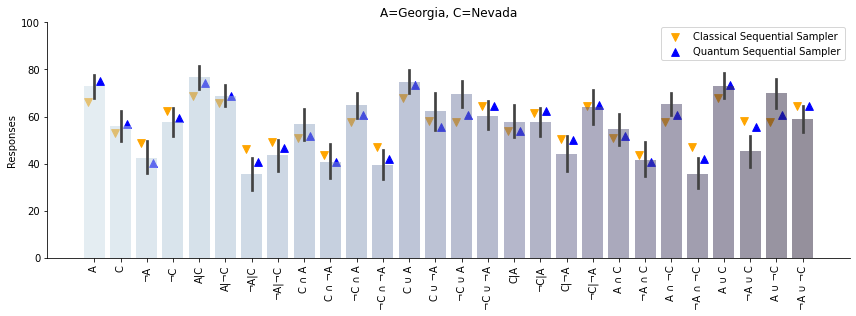

In [42]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=four_sig_tab["tab"]["B1_B3"]["data"], alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.xticks(rotation = 90)
plt.ylim(0,100)
plt.title("A=Georgia, C=Nevada")
plt.scatter(four_sig_tab["tab"]["B1_B3"]["CSS"]["pred"].unique(), four_sig_tab["mean"]["B1_B3"]["CSS"], 
            marker = "v", color = "orange", s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler",
           transform=trans+offset(-6))
plt.scatter(four_sig_tab["tab"]["B1_B3"]["QSS"]["pred"].unique(), four_sig_tab["mean"]["B1_B3"]["QSS"], 
            marker = "^", color = "blue", s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",
           transform=trans+offset(6))
plt.legend()
plt.xlabel("")
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.savefig("foursig/mean_B1_B3_foursig.jpg",dpi = 500)

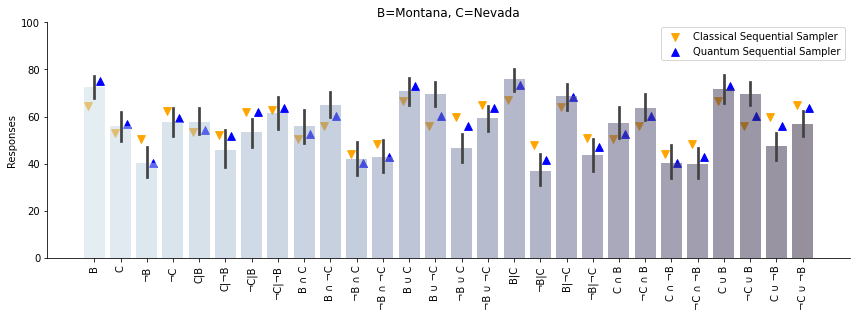

In [43]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=four_sig_tab["tab"]["B2_B3"]["data"], alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.xticks(rotation = 90)
plt.ylim(0,100)
plt.title("B=Montana, C=Nevada")
plt.scatter(four_sig_tab["tab"]["B2_B3"]["CSS"]["pred"].unique(), four_sig_tab["mean"]["B2_B3"]["CSS"], 
            marker = "v", color = "orange", s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler",
           transform=trans+offset(-6))
plt.scatter(four_sig_tab["tab"]["B2_B3"]["QSS"]["pred"].unique(), four_sig_tab["mean"]["B2_B3"]["QSS"], 
            marker = "^", color = "blue", s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",
           transform=trans+offset(6))
plt.legend()
plt.xlabel("")
plt.ylabel("Responses")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.subplots_adjust(bottom=0.22)
plt.tight_layout()
plt.savefig("foursig/mean_B2_B3_foursig.jpg",dpi = 500)